In [1]:
# Import python library
import numpy as np
import mne
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# read raw SSVEP data
raw1=mne.io.read_raw_curry('SSVEP.dat')
raw2=mne.io.read_raw_curry('SSVEPWXL.dat')

Leaving device<->head transform as None (no landmarks found)
Event file found. Extracting Annotations from C:\Users\OWNER\Desktop\Arthit Learn to Analysis EEG\SSVEP and EEGnet\SSVEP.ceo...
Leaving device<->head transform as None (no landmarks found)
Event file found. Extracting Annotations from C:\Users\OWNER\Desktop\Arthit Learn to Analysis EEG\SSVEP and EEGnet\SSVEPWXL.ceo...


In [3]:
#pick only eeg
raw1.pick_types(eeg=True)
raw2.pick_types(eeg=True)

<RawCurry | SSVEPWXL.dat, 122 x 447600 (447.6 s), ~116 kB, data not loaded>

In [4]:
#apply BP filter and nouch filter
raw1.load_data().notch_filter(np.arange(50,500,50),verbose=False)
raw1.filter(l_freq=0.1,h_freq=None,method='iir')

raw2.load_data().notch_filter(np.arange(50,500,50),verbose=False)
raw2.filter(l_freq=0.1,h_freq=None,method='iir')

Reading 0 ... 434699  =      0.000 ...   434.699 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

IIR filter parameters
---------------------
Butterworth highpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 0.10 Hz: -6.02 dB

Reading 0 ... 447599  =      0.000 ...   447.599 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

IIR filter parameters
---------------------
Butterworth highpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 0.10 Hz: -6.02 dB



<RawCurry | SSVEPWXL.dat, 122 x 447600 (447.6 s), ~416.7 MB, data loaded>

In [5]:
# Annotation Function
#define duration each events
def find_net_annotation(raw_filted):
    raw=raw_filted
    for ann in range(17):
        raw_filted.annotations.duration[ann]=raw.annotations[ann+1]['onset']-raw.annotations[ann]['onset']
    # delete no need annotation 
    raw_filted.annotations.delete(np.arange(1,len(raw.annotations),2))
    raw_filted.annotations.onset
    #segmentation function
    def segment_eeg_data(start=None,end=None,duration=None,description=None):
        onset=list(np.arange(round(start),round(end),duration))
        return onset,[duration for j in range(len(onset))],[description for i in range(len(onset))]
    
    #declare variable
    onset=raw_filted.annotations.onset
    duration=raw_filted.annotations.duration
    labels=raw_filted.annotations.description
    end=np.round(onset+duration)
    onset_new=[]
    duration_new=[]
    descrip_new=[]
    for on,end,labs in zip(onset,end,labels):
        s,d,p=segment_eeg_data(start=on,end=end,duration=1,description=labs)
        onset_new.append(s)
        duration_new.append(d)
        descrip_new.append(p)
        
    #reshape data
    onset=[]
    duration=[]
    labels=[]
    for re in np.arange(len(onset_new)):
        onset=onset+onset_new[re]
        duration=duration+duration_new[re]
        labels=labels+descrip_new[re]
        
    #create annotation
    my_annot = mne.Annotations(onset=onset,  # in seconds
                               duration=duration,  # in seconds, too
                               description=labels)
    
    #Delete all old annotation
    raw_filted.annotations.delete(np.arange(0,len(raw_filted.annotations),1))
    
    #Set new annotation
    raw_filted.set_annotations(my_annot)
    return raw_filted

In [6]:
raw1=find_net_annotation(raw1.copy())
raw2=find_net_annotation(raw2.copy())

## Epoch process 

In [7]:
event1,_id1=mne.events_from_annotations(raw1)

event2,_id2=mne.events_from_annotations(raw2)

Used Annotations descriptions: ['10', '20', '30']
Used Annotations descriptions: ['10', '20', '30']


In [8]:
pick_chs=[
    'P7',
 'P9',
 'P11',
 'PO11',
 'PO9',
 'PPO7',
 'P5',
 'P3',
 'PO3',
 'POO7',
 'POO9h',
 'POO11h',
 'OI1',
 'POO3',
 'PO1',
 'PPO1',
 'PPOz',
 'POz',
 'POOz',
 'Oz',
 'OI2',
 'POO4',
 'PO2',
 'PPO2',
 'P4',
 'PO4',
 'POO8',
 'POO10h',
 'POO12h',
 'PO12',
 'PO10',
 'PPO8',
 'P6',
 'P8',
 'P10',
 'P12',
          ]

In [9]:
event_id={'10Hz':1,
          '20Hz':2,
          '30Hz':3
}

In [10]:
epochs1=mne.Epochs(raw1,event1,event_id,tmin=-0.1,tmax=1,picks=pick_chs)

epochs2=mne.Epochs(raw2,event2,event_id,tmin=-0.1,tmax=1,picks=pick_chs)

del raw1,raw2

Not setting metadata
Not setting metadata
273 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
Not setting metadata
272 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


In [11]:
epochs1.load_data().filter(l_freq=4,h_freq=40,method='iir')

epochs2.load_data().filter(l_freq=4,h_freq=40,method='iir')

Loading data for 273 events and 1101 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 4 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 40.00 Hz: -6.02, -6.02 dB

Loading data for 272 events and 1101 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 4 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 40.00 Hz: -6.02, -6.02 dB



Number of events,272
Events,10Hz: 9220Hz: 9030Hz: 90
Time range,-0.100 – 1.000 sec
Baseline,-0.100 – 0.000 sec


In [12]:
epochs1.set_eeg_reference(ref_channels='average',verbose=False)
epochs2.set_eeg_reference(ref_channels='average',verbose=False)

Number of events,272
Events,10Hz: 9220Hz: 9030Hz: 90
Time range,-0.100 – 1.000 sec
Baseline,-0.100 – 0.000 sec


## Preprocess data 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
## mne decoding library
from mne.decoding import Vectorizer,cross_val_multiscore,get_coef,Scaler

In [14]:
X1=epochs1.get_data()
y1=epochs1.events[:,-1]

X2=epochs2.get_data()
y2=epochs2.events[:,-1]

del epochs2

In [15]:
X1.shape

(273, 36, 1101)

In [16]:
X=np.concatenate((X1,X2),axis=0)
y=np.concatenate((y1,y2),axis=0)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [18]:
scaler=Scaler(epochs1.info)
scaler.fit(X_train,X_train.shape[0])
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

del epochs1

##  EEGnet algorithm

In [19]:
from EEGModels import EEGNet
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils as np_utils

In [20]:
kernels,chans,samples=1,X.shape[1],X.shape[2]

In [21]:
class_weigths={0:1, 1:1, 2:1, 3:1}

In [22]:
yc_train = np_utils.to_categorical(y_train-1)
yc_test = np_utils.to_categorical(y_test-1)

In [23]:
#reshape X
Xc_train=X_train.reshape(X_train.shape[0],chans,samples,kernels)
Xc_test=X_test.reshape(X_test.shape[0],chans,samples,kernels)

In [24]:
model=EEGNet(nb_classes=3,Chans=chans,Samples=samples,dropoutRate=0.5,
            kernLength=250,F1=8,D=2,F2=16,dropoutType='Dropout')

In [25]:
#model.compile(loss='CategoricalCrossentropy',optimizer='adam',metrics='accuracy')
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [26]:
numParams=model.count_params()

In [27]:
checkpointer=ModelCheckpoint(filepath='Users\OWNER\Desktop\Arthit Learn to Analysis EEG.h5',verbose=1,save_best_only=True)

In [28]:
fittedmodel=model.fit(Xc_train,yc_train,batch_size=16,epochs=500,verbose=2,
                      validation_data=(Xc_test,yc_test),callbacks=[checkpointer],class_weight=class_weigths)

Epoch 1/500

Epoch 00001: val_loss improved from inf to 1.09119, saving model to Users\OWNER\Desktop\Arthit Learn to Analysis EEG.h5
24/24 - 17s - loss: 1.1306 - accuracy: 0.3228 - val_loss: 1.0912 - val_accuracy: 0.4085
Epoch 2/500

Epoch 00002: val_loss improved from 1.09119 to 1.07234, saving model to Users\OWNER\Desktop\Arthit Learn to Analysis EEG.h5
24/24 - 17s - loss: 1.0747 - accuracy: 0.3806 - val_loss: 1.0723 - val_accuracy: 0.3598
Epoch 3/500

Epoch 00003: val_loss improved from 1.07234 to 1.03145, saving model to Users\OWNER\Desktop\Arthit Learn to Analysis EEG.h5
24/24 - 17s - loss: 0.9940 - accuracy: 0.5092 - val_loss: 1.0315 - val_accuracy: 0.4573
Epoch 4/500

Epoch 00004: val_loss improved from 1.03145 to 0.96993, saving model to Users\OWNER\Desktop\Arthit Learn to Analysis EEG.h5
24/24 - 17s - loss: 0.8941 - accuracy: 0.6220 - val_loss: 0.9699 - val_accuracy: 0.3659
Epoch 5/500

Epoch 00005: val_loss improved from 0.96993 to 0.92326, saving model to Users\OWNER\Desktop

Epoch 44/500

Epoch 00044: val_loss improved from 0.41629 to 0.40674, saving model to Users\OWNER\Desktop\Arthit Learn to Analysis EEG.h5
24/24 - 17s - loss: 0.2878 - accuracy: 0.9081 - val_loss: 0.4067 - val_accuracy: 0.8720
Epoch 45/500

Epoch 00045: val_loss did not improve from 0.40674
24/24 - 17s - loss: 0.3205 - accuracy: 0.8793 - val_loss: 0.4408 - val_accuracy: 0.8598
Epoch 46/500

Epoch 00046: val_loss did not improve from 0.40674
24/24 - 17s - loss: 0.2582 - accuracy: 0.9291 - val_loss: 0.4285 - val_accuracy: 0.8415
Epoch 47/500

Epoch 00047: val_loss improved from 0.40674 to 0.39625, saving model to Users\OWNER\Desktop\Arthit Learn to Analysis EEG.h5
24/24 - 17s - loss: 0.3010 - accuracy: 0.9055 - val_loss: 0.3963 - val_accuracy: 0.8720
Epoch 48/500

Epoch 00048: val_loss did not improve from 0.39625
24/24 - 17s - loss: 0.3135 - accuracy: 0.9160 - val_loss: 0.3964 - val_accuracy: 0.8720
Epoch 49/500

Epoch 00049: val_loss did not improve from 0.39625
24/24 - 17s - loss: 0.25

Epoch 96/500

Epoch 00096: val_loss did not improve from 0.38304
24/24 - 17s - loss: 0.2080 - accuracy: 0.9475 - val_loss: 0.4017 - val_accuracy: 0.8841
Epoch 97/500

Epoch 00097: val_loss did not improve from 0.38304
24/24 - 17s - loss: 0.2417 - accuracy: 0.9186 - val_loss: 0.4145 - val_accuracy: 0.8720
Epoch 98/500

Epoch 00098: val_loss did not improve from 0.38304
24/24 - 17s - loss: 0.2014 - accuracy: 0.9449 - val_loss: 0.4623 - val_accuracy: 0.8598
Epoch 99/500

Epoch 00099: val_loss did not improve from 0.38304
24/24 - 17s - loss: 0.2491 - accuracy: 0.9160 - val_loss: 0.4279 - val_accuracy: 0.8537
Epoch 100/500

Epoch 00100: val_loss did not improve from 0.38304
24/24 - 17s - loss: 0.1985 - accuracy: 0.9475 - val_loss: 0.4212 - val_accuracy: 0.8902
Epoch 101/500

Epoch 00101: val_loss did not improve from 0.38304
24/24 - 17s - loss: 0.2624 - accuracy: 0.9055 - val_loss: 0.4825 - val_accuracy: 0.8171
Epoch 102/500

Epoch 00102: val_loss did not improve from 0.38304
24/24 - 17s - 

Epoch 149/500

Epoch 00149: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.1278 - accuracy: 0.9685 - val_loss: 0.4381 - val_accuracy: 0.8720
Epoch 150/500

Epoch 00150: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.1358 - accuracy: 0.9606 - val_loss: 0.4186 - val_accuracy: 0.8659
Epoch 151/500

Epoch 00151: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.1289 - accuracy: 0.9711 - val_loss: 0.4435 - val_accuracy: 0.8598
Epoch 152/500

Epoch 00152: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.1205 - accuracy: 0.9711 - val_loss: 0.4070 - val_accuracy: 0.8659
Epoch 153/500

Epoch 00153: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.1041 - accuracy: 0.9869 - val_loss: 0.4298 - val_accuracy: 0.8293
Epoch 154/500

Epoch 00154: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.1707 - accuracy: 0.9501 - val_loss: 0.4153 - val_accuracy: 0.8476
Epoch 155/500

Epoch 00155: val_loss did not improve from 0.37845
24/24 - 17

Epoch 203/500

Epoch 00203: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.1209 - accuracy: 0.9685 - val_loss: 0.4768 - val_accuracy: 0.8537
Epoch 204/500

Epoch 00204: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.0988 - accuracy: 0.9790 - val_loss: 0.4115 - val_accuracy: 0.8415
Epoch 205/500

Epoch 00205: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.1225 - accuracy: 0.9738 - val_loss: 0.4247 - val_accuracy: 0.8537
Epoch 206/500

Epoch 00206: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.1327 - accuracy: 0.9711 - val_loss: 0.4531 - val_accuracy: 0.8659
Epoch 207/500

Epoch 00207: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.1749 - accuracy: 0.9370 - val_loss: 0.4749 - val_accuracy: 0.8476
Epoch 208/500

Epoch 00208: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.1320 - accuracy: 0.9685 - val_loss: 0.5642 - val_accuracy: 0.8476
Epoch 209/500

Epoch 00209: val_loss did not improve from 0.37845
24/24 - 17

Epoch 257/500

Epoch 00257: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.1014 - accuracy: 0.9711 - val_loss: 0.4428 - val_accuracy: 0.8537
Epoch 258/500

Epoch 00258: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.0883 - accuracy: 0.9816 - val_loss: 0.4651 - val_accuracy: 0.8476
Epoch 259/500

Epoch 00259: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.0910 - accuracy: 0.9711 - val_loss: 0.4887 - val_accuracy: 0.8537
Epoch 260/500

Epoch 00260: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.0888 - accuracy: 0.9816 - val_loss: 0.5317 - val_accuracy: 0.8598
Epoch 261/500

Epoch 00261: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.0979 - accuracy: 0.9764 - val_loss: 0.4777 - val_accuracy: 0.8476
Epoch 262/500

Epoch 00262: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.1187 - accuracy: 0.9606 - val_loss: 0.5223 - val_accuracy: 0.8354
Epoch 263/500

Epoch 00263: val_loss did not improve from 0.37845
24/24 - 17

Epoch 311/500

Epoch 00311: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.0918 - accuracy: 0.9764 - val_loss: 0.5622 - val_accuracy: 0.8476
Epoch 312/500

Epoch 00312: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.1133 - accuracy: 0.9711 - val_loss: 0.5103 - val_accuracy: 0.8598
Epoch 313/500

Epoch 00313: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.1172 - accuracy: 0.9711 - val_loss: 0.5989 - val_accuracy: 0.8171
Epoch 314/500

Epoch 00314: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.1238 - accuracy: 0.9659 - val_loss: 0.4748 - val_accuracy: 0.8598
Epoch 315/500

Epoch 00315: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.0987 - accuracy: 0.9711 - val_loss: 0.5480 - val_accuracy: 0.8415
Epoch 316/500

Epoch 00316: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.0960 - accuracy: 0.9764 - val_loss: 0.5411 - val_accuracy: 0.8537
Epoch 317/500

Epoch 00317: val_loss did not improve from 0.37845
24/24 - 17

Epoch 365/500

Epoch 00365: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.0901 - accuracy: 0.9711 - val_loss: 0.5684 - val_accuracy: 0.8354
Epoch 366/500

Epoch 00366: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.0784 - accuracy: 0.9738 - val_loss: 0.5413 - val_accuracy: 0.8354
Epoch 367/500

Epoch 00367: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.0739 - accuracy: 0.9843 - val_loss: 0.5433 - val_accuracy: 0.8232
Epoch 368/500

Epoch 00368: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.0824 - accuracy: 0.9816 - val_loss: 0.5823 - val_accuracy: 0.8293
Epoch 369/500

Epoch 00369: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.0506 - accuracy: 0.9974 - val_loss: 0.5524 - val_accuracy: 0.8415
Epoch 370/500

Epoch 00370: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.0626 - accuracy: 0.9816 - val_loss: 0.5795 - val_accuracy: 0.8354
Epoch 371/500

Epoch 00371: val_loss did not improve from 0.37845
24/24 - 17

Epoch 419/500

Epoch 00419: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.1275 - accuracy: 0.9633 - val_loss: 0.4977 - val_accuracy: 0.8293
Epoch 420/500

Epoch 00420: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.2049 - accuracy: 0.9134 - val_loss: 0.5096 - val_accuracy: 0.8110
Epoch 421/500

Epoch 00421: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.0938 - accuracy: 0.9764 - val_loss: 0.4971 - val_accuracy: 0.8537
Epoch 422/500

Epoch 00422: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.1275 - accuracy: 0.9528 - val_loss: 0.4537 - val_accuracy: 0.8598
Epoch 423/500

Epoch 00423: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.1797 - accuracy: 0.9213 - val_loss: 0.6367 - val_accuracy: 0.7927
Epoch 424/500

Epoch 00424: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.1353 - accuracy: 0.9291 - val_loss: 0.5752 - val_accuracy: 0.8293
Epoch 425/500

Epoch 00425: val_loss did not improve from 0.37845
24/24 - 17

Epoch 473/500

Epoch 00473: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.0611 - accuracy: 0.9843 - val_loss: 0.5525 - val_accuracy: 0.8354
Epoch 474/500

Epoch 00474: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.1190 - accuracy: 0.9606 - val_loss: 0.5321 - val_accuracy: 0.8476
Epoch 475/500

Epoch 00475: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.1483 - accuracy: 0.9528 - val_loss: 0.7382 - val_accuracy: 0.8232
Epoch 476/500

Epoch 00476: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.1043 - accuracy: 0.9738 - val_loss: 0.5309 - val_accuracy: 0.8476
Epoch 477/500

Epoch 00477: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.0916 - accuracy: 0.9738 - val_loss: 0.6743 - val_accuracy: 0.8049
Epoch 478/500

Epoch 00478: val_loss did not improve from 0.37845
24/24 - 17s - loss: 0.0732 - accuracy: 0.9816 - val_loss: 0.5884 - val_accuracy: 0.8232
Epoch 479/500

Epoch 00479: val_loss did not improve from 0.37845
24/24 - 17

In [29]:
model.load_weights('Users\OWNER\Desktop\Arthit Learn to Analysis EEG.h5')

In [30]:
probs=model.predict(Xc_test)
preds=probs.argmax(axis=-1)
acc=np.mean(preds==yc_test.argmax(axis=-1))

In [31]:
acc

0.8658536585365854

In [32]:
preds=preds+1

In [33]:
preds

array([3, 1, 1, 1, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 2, 3, 2, 3, 2, 3, 2, 2,
       1, 2, 3, 3, 3, 1, 2, 3, 2, 3, 1, 2, 2, 2, 3, 3, 2, 1, 3, 1, 3, 1,
       3, 2, 2, 3, 1, 1, 1, 3, 1, 2, 3, 1, 2, 3, 3, 2, 3, 1, 1, 3, 3, 2,
       2, 1, 2, 3, 3, 1, 1, 2, 2, 3, 3, 3, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 3, 1, 1, 3, 1, 1, 3, 3, 3, 1, 3, 1,
       2, 3, 3, 3, 2, 2, 1, 3, 1, 3, 3, 3, 1, 3, 3, 2, 3, 1, 3, 2, 3, 3,
       3, 3, 2, 3, 3, 3, 2, 1, 1, 2, 2, 1, 2, 3, 3, 2, 3, 3, 3, 1, 3, 1,
       3, 3, 1, 1, 1, 2, 3, 1, 1, 2], dtype=int64)

In [34]:
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

[[48  2  7]
 [ 3 44  7]
 [ 1  2 50]]
              precision    recall  f1-score   support

           1       0.92      0.84      0.88        57
           2       0.92      0.81      0.86        54
           3       0.78      0.94      0.85        53

    accuracy                           0.87       164
   macro avg       0.87      0.87      0.87       164
weighted avg       0.88      0.87      0.87       164



In [37]:
preds

array([3, 1, 1, 1, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 2, 3, 2, 3, 2, 3, 2, 2,
       1, 2, 3, 3, 3, 1, 2, 3, 2, 3, 1, 2, 2, 2, 3, 3, 2, 1, 3, 1, 3, 1,
       3, 2, 2, 3, 1, 1, 1, 3, 1, 2, 3, 1, 2, 3, 3, 2, 3, 1, 1, 3, 3, 2,
       2, 1, 2, 3, 3, 1, 1, 2, 2, 3, 3, 3, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 3, 1, 1, 3, 1, 1, 3, 3, 3, 1, 3, 1,
       2, 3, 3, 3, 2, 2, 1, 3, 1, 3, 3, 3, 1, 3, 3, 2, 3, 1, 3, 2, 3, 3,
       3, 3, 2, 3, 3, 3, 2, 1, 1, 2, 2, 1, 2, 3, 3, 2, 3, 3, 3, 1, 3, 1,
       3, 3, 1, 1, 1, 2, 3, 1, 1, 2], dtype=int64)

## plot History

In [63]:
plt.plot(fittedmodel.history['accuracy'])
plt.plot(fittedmodel.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train','varidation'],loc='lower right')
plt.show()

<IPython.core.display.Javascript object>


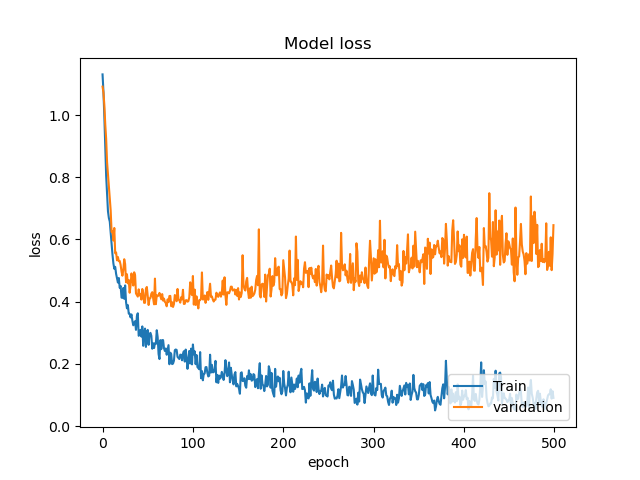

In [64]:
#loss
plt.plot(fittedmodel.history['loss'])
plt.plot(fittedmodel.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','varidation'],loc='lower right')
plt.show()